# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202212

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-47e3bcc2019c>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [8]:
# create data
def create_data(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y
  # and plot
  # plt.plot(x,y,'s')
  # plt.show()

In [20]:
# train the model
def train_model(x,y):
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
  learningRate = .05

# loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  predictions = ANNreg(x)
    # testloss = (predictions-y).pow(2).mean()

  return predictions, losses

In [22]:
slopes = np.linspace(-2, 2, 21)
results = np.zeros((len(slopes),50, 2))

for m in range(len(slopes)):
  for j in range(50):
    x,y = create_data(slopes[m])
    predic, loss = train_model(x,y)
    correlation = np.corrcoef(y.detach().numpy().T, predic.detach().numpy().T)[0,1]
    results[m,j,0] = correlation
    results[m,j,1] = loss[-1]  #final loss when training is completed

results[np.isnan(results)] = 0

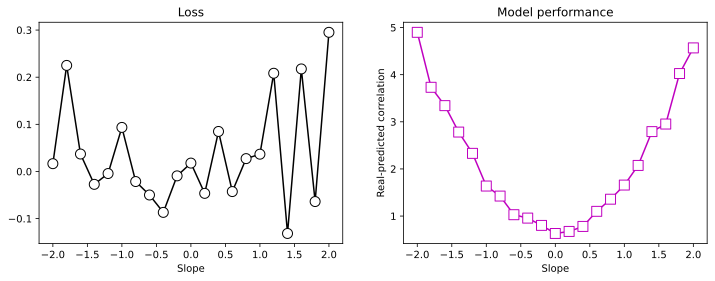

In [23]:

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

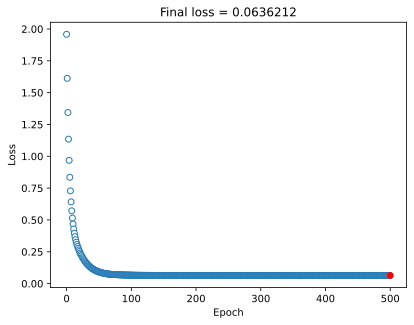

In [ ]:
# show the losses

# manually compute losses
# final forward pass

# final loss (MSE)

# plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
# plt.plot(numepochs,testloss.detach(),'ro')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Final loss = %g' %testloss.item())
# plt.show()

In [ ]:
testloss.item()

0.06362122297286987

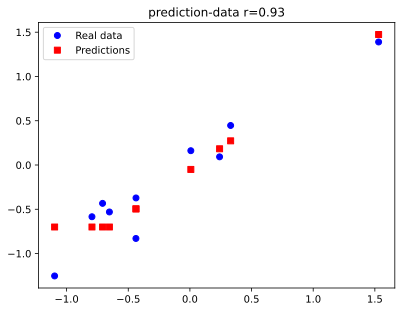

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

In [ ]:
def train_model():
  N = 30
  x = torch.randn(N,1)
  y = x + torch.randn(N,1)/2
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

  # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNreg(x)

  # final loss (MSE)
  testloss = (predictions-y).pow(2).mean()
  print(testloss.item())
  return testloss.item()

In [ ]:
loss = []
for i in range(100):
  loss.append(train_model())

0.20190781354904175
0.23193830251693726
0.9006251692771912
0.12026891857385635
0.23597362637519836
0.1848253756761551
1.950842022895813
1.5209119319915771
0.8987929821014404
0.2161855399608612
1.1490058898925781
0.3922477960586548
0.1980678141117096
0.18180130422115326
0.12787167727947235
0.2150173932313919
0.3074243366718292
1.3784788846969604
0.15016725659370422
0.18628501892089844
1.4632773399353027
1.1645314693450928
0.15574057400226593
0.1872532218694687
1.1884844303131104
0.2721215486526489
0.702139139175415
1.1566662788391113
0.460618793964386
0.26799196004867554
0.23883004486560822
0.17037998139858246
0.1902172863483429
0.20590850710868835
0.3198298215866089
0.21647395193576813
0.2749813199043274
0.12064408510923386
0.2353406548500061
0.24334941804409027
1.7100636959075928
0.335826575756073
0.21786703169345856
0.1791268289089203
0.2387416660785675
0.22114533185958862
0.13261787593364716
0.23140116035938263
0.7603469491004944
0.3294067084789276
0.17712828516960144
0.268089920282

TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
counter = 0
for i in losses:
  if i > 0.25:
    counter +=1

counter

21